# Minimal example with TensorFlow 2.0
In this notebook we will recreate our machine learning algorithm using TF 2.0.

## Import the relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Data generation

In [2]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1, 1, (observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

# save tensor in .npz file
np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)


## Solving with TensorFlow

In [3]:
training_data = np.load('TF_intro.npz')

In [19]:
input_size = 2 # there are two input variables, i.e. xs and zs
output_size = 1 # there is only one output, i.e. ys

# Let's build our model
# output = np.dot(inputs, weights) + bias

# create model object
model = tf.keras.Sequential([
                            tf.keras.layers.Dense(# calculates dot product of inputs and weights
                                output_size,
                                kernel_initializer=tf.random_uniform_initializer(minval=-0.1,maxval=0.1),
                                bias_initializer=tf.random_uniform_initializer(minval=-0.1,maxval=0.1)
                                )
                            ])

# specify loss function and optimization algorithm
# sgd : 'stochastic gradiant descent'
# mean_squarded_error : L2-norm loss scaled by the number of observations

custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)

#model.compile(optimizer='sgd', loss='mean_squared_error')
model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

# indicate to the model object which data to fit
# epochs : number of iterations
model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Epoch 1/100
32/32 - 0s - loss: 36.1630 - 335ms/epoch - 10ms/step
Epoch 2/100
32/32 - 0s - loss: 1.0546 - 41ms/epoch - 1ms/step
Epoch 3/100
32/32 - 0s - loss: 0.4298 - 40ms/epoch - 1ms/step
Epoch 4/100
32/32 - 0s - loss: 0.4319 - 41ms/epoch - 1ms/step
Epoch 5/100
32/32 - 0s - loss: 0.3823 - 40ms/epoch - 1ms/step
Epoch 6/100
32/32 - 0s - loss: 0.3638 - 40ms/epoch - 1ms/step
Epoch 7/100
32/32 - 0s - loss: 0.3613 - 38ms/epoch - 1ms/step
Epoch 8/100
32/32 - 0s - loss: 0.4319 - 40ms/epoch - 1ms/step
Epoch 9/100
32/32 - 0s - loss: 0.3782 - 40ms/epoch - 1ms/step
Epoch 10/100
32/32 - 0s - loss: 0.4103 - 35ms/epoch - 1ms/step
Epoch 11/100
32/32 - 0s - loss: 0.3764 - 40ms/epoch - 1ms/step
Epoch 12/100
32/32 - 0s - loss: 0.4070 - 40ms/epoch - 1ms/step
Epoch 13/100
32/32 - 0s - loss: 0.3662 - 44ms/epoch - 1ms/step
Epoch 14/100
32/32 - 0s - loss: 0.3715 - 41ms/epoch - 1ms/step
Epoch 15/100
32/32 - 0s - loss: 0.4179 - 38ms/epoch - 1ms/step
Epoch 16/100
32/32 - 0s - loss: 0.3677 - 38ms/epoch - 1ms/ste

## Extract the weights and biases

In [8]:
model.layers[0].get_weights() # our model only has one layer

[array([[ 1.9737949],
        [-3.028609 ]], dtype=float32),
 array([5.0095587], dtype=float32)]

## Predict values using our model

In [10]:
model.predict_on_batch(training_data['inputs'])

array([[ 4.06056519e+01],
       [-3.02074051e+01],
       [ 4.09902039e+01],
       [ 1.61141052e+01],
       [-9.35024738e+00],
       [ 1.84526634e+00],
       [-2.98738098e+00],
       [ 1.21388702e+01],
       [-2.34780579e+01],
       [-1.06453753e+01],
       [ 3.24055328e+01],
       [-1.17056341e+01],
       [-4.17631073e+01],
       [ 2.44661713e+01],
       [-2.34362640e+01],
       [-3.00804672e+01],
       [ 5.80937481e+00],
       [-1.23403368e+01],
       [ 1.83015022e+01],
       [-1.10265760e+01],
       [-8.96361351e+00],
       [ 8.04998684e+00],
       [ 2.37465134e+01],
       [ 6.73667908e-01],
       [ 1.34369469e+01],
       [-1.98625231e+00],
       [ 4.22785149e+01],
       [-1.25906343e+01],
       [ 1.54377508e+01],
       [-2.37154236e+01],
       [-1.83973122e+01],
       [ 1.91105957e+01],
       [ 8.48405075e+00],
       [-1.83957443e+01],
       [ 2.80265884e+01],
       [ 1.19885979e+01],
       [ 1.32145472e+01],
       [ 1.36879349e+01],
       [ 1.9

## Plot the Prection (Outputs) against the Targets

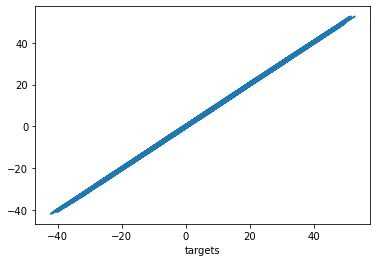

In [20]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.xlabel('targets')
plt.show()

# our plot should ressemble a 45 degre line